## This notebook serves the purpose of cleaning, visualizing and analysing the data retrieved from the supermarkets' websites. 

In [1]:
import pandas as pd

In [2]:
pingo_doce = pd.read_csv("pingo_doce_raw_data.csv")
pingo_doce.head()

,Name,Quantity,Price,Time scraped
0,Doce de Abóbora Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22
1,Sal em Saco Rui Simeão Marinho DOP,"1.5 KG | 0,91 €/KG\n","1,37 €",2023-05-12 18:26:22
2,Doce de Tomate Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22
3,Snack Hóstias de Camarão Zanuy,"50 G | 35,80 €/KG\n","1,79 €",2023-05-12 18:26:22
4,Cacau Cru em Pepitas Seara,"100 G | 39,90 €/KG\n","3,99 €",2023-05-12 18:26:22


In [3]:
pingo_doce.shape

(6226, 4)

In [4]:
pingo_doce.columns

Index(['Name', 'Quantity', 'Price', 'Time scraped'], dtype='object')

### We'll create a new column to store which category each product belongs.  

In [5]:
# Create dict with all IDS

dict_categories = {"mercearia":3639, "frutas_legumes":254,"talho":120,"peixaria":127,"charcutaria":200,"padaria_pastelaria":237,"take-away":86,"congelados":514,"leite_ovos_natas":161,"frigorífico":888}
sum_prods = 0
for i in dict_categories:
    sum_prods += dict_categories[i]
    
sum_prods
    
dict_categories


{'mercearia': 3639,
 'frutas_legumes': 254,
 'talho': 120,
 'peixaria': 127,
 'charcutaria': 200,
 'padaria_pastelaria': 237,
 'take-away': 86,
 'congelados': 514,
 'leite_ovos_natas': 161,
 'frigorífico': 888}

In [6]:
#Create dict with all IDS

previous_category = 0
running_sum = 3639
for i in dict_categories:
    if i == "mercearia":
        continue
    else:
        running_sum += dict_categories[i]
        dict_categories[i] = running_sum
        
print(dict_categories)
print(len(pingo_doce))

{'mercearia': 3639, 'frutas_legumes': 3893, 'talho': 4013, 'peixaria': 4140, 'charcutaria': 4340, 'padaria_pastelaria': 4577, 'take-away': 4663, 'congelados': 5177, 'leite_ovos_natas': 5338, 'frigorífico': 6226}
6226


### The code bellow assigns the categories to the products based on his index values and the thresholds specified in the dict_categories dict. The assigned categories are stored in the category list. Then, this list is imputed in the dataframe as a column ('Category'). 

In [7]:
category = []
index_counter = 0
for index, row in pingo_doce.iterrows(): # the llop iterates over the pingo_doce dataframe 
    index_counter += 1
    if index <= dict_categories["mercearia"]:       
        category.append("mercearia")
    elif dict_categories["mercearia"]< index <= dict_categories["frutas_legumes"]:
        category.append("frutas_legumes")
    elif dict_categories["frutas_legumes"]< index <= dict_categories["talho"]:
        category.append("talho") 
    elif dict_categories["talho"]< index <= dict_categories["peixaria"]:
        category.append("peixaria")     
    elif dict_categories["peixaria"]< index <= dict_categories["charcutaria"]:
        category.append("peixaria")     
    elif dict_categories["charcutaria"]< index <= dict_categories["padaria_pastelaria"]:
        category.append("padaria_pastelaria")      
    elif dict_categories["padaria_pastelaria"]< index <= dict_categories["take-away"]:
        category.append("take-away")         
    elif dict_categories["take-away"]< index <= dict_categories["congelados"]:
        category.append("congelados")         
    elif dict_categories["congelados"]< index <= dict_categories["leite_ovos_natas"]:
        category.append("leite_ovos_natas")         
    elif dict_categories["leite_ovos_natas"]< index <= dict_categories["frigorífico"]:
        category.append("frigorífico")             
print(len(category), index_counter)

6226 6226


In [8]:
pingo_doce["Category"] = category

### As we can see bellow, the pingo doce dataframe has 6226 products of the categories (mercearia: 3639, frutas_legumes: 254, talho: 120, peixaria: 127, charcutaria: 200, padaria_pastelaria: 237, take-away: 86, congelados: 514, leite_ovos_natas: 161 and frigorífico: 888). 

In [9]:
print(pingo_doce.shape)
print(pingo_doce.info())

(6226, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          6226 non-null   object
 1   Quantity      6226 non-null   object
 2   Price         6226 non-null   object
 3   Time scraped  6226 non-null   object
 4   Category      6226 non-null   object
dtypes: object(5)
memory usage: 243.3+ KB
None


In [10]:
pingo_doce.head()

,Name,Quantity,Price,Time scraped,Category
0,Doce de Abóbora Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia
1,Sal em Saco Rui Simeão Marinho DOP,"1.5 KG | 0,91 €/KG\n","1,37 €",2023-05-12 18:26:22,mercearia
2,Doce de Tomate Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia
3,Snack Hóstias de Camarão Zanuy,"50 G | 35,80 €/KG\n","1,79 €",2023-05-12 18:26:22,mercearia
4,Cacau Cru em Pepitas Seara,"100 G | 39,90 €/KG\n","3,99 €",2023-05-12 18:26:22,mercearia


In [11]:
pingo_doce.tail()

,Name,Quantity,Price,Time scraped,Category
6221,Requeijão Embalado Montiqueijo,"190 G | 6,68 €/KG\n","1,27 € 1,59 €",2023-05-12 16:32:53,frigorífico
6222,Requeijão de Ovelha Seia Lagos,"200 G | 9,20 €/KG\n","1,84 € 2,16 €",2023-05-12 16:32:53,frigorífico
6223,Tagliatelle Carbonara Kit Rana,"408 G | 9,17 €/KG\n","3,74 € 4,99 €",2023-05-12 16:32:53,frigorífico
6224,Queijo Prato Curado Amanteigado D. Pedro,"1,1 KG ~ 1 UN | 10,84 €/KG\n","10,84 €/Kg 14,48 €/Kg",2023-05-12 16:32:53,frigorífico
6225,Queijo Prato Meio Gordo Apimentado D. Pedro,"1 KG ~ 1 UN | 10,84 €/KG\n","10,84 €/Kg 14,48 €/Kg",2023-05-12 16:32:53,frigorífico


### Since the HTML structure of Mercadao.pt website contained the quantity and the price per unit measure of each product in the same tag/class/css selector/x.path, we'll extract from the 'Quantity' column the Amount, Units, Price per unit Measure and the Currency. Then, with this information extracted we'll create 4 new columns. 

In [12]:
quantity = pingo_doce["Quantity"]
# for i in quantity:
#     print(i)

### Strip and plit the strings in 'Quantity' column to obtain a list with the price and weight information separately

In [13]:
new_quantity = []
for i in quantity:
    clean_i =  i.strip("~ 1 UN")
    new_quantity.append(i.split("|"))
    

In [14]:
new_quantity[:4]

[[' 310 G  ', ' 6,42\xa0€/KG\n'],
 [' 1.5 KG  ', ' 0,91\xa0€/KG\n'],
 [' 310 G  ', ' 6,42\xa0€/KG\n'],
 [' 50 G  ', ' 35,80\xa0€/KG\n']]

### We now need to separate units and the numeric values of them like amount and price per unit of measure. The following code extract the weight and price per weight values from the new_quantity object and store them in separate lists (weight and price_per_weight) for further processing and analysis.

In [15]:
weight = []
price_per_weight= []
for i,j in new_quantity:
    weight.append(i)
    price_per_weight.append(j)

In [16]:
weight[:4]

[' 310 G  ', ' 1.5 KG  ', ' 310 G  ', ' 50 G  ']

In [17]:
price_per_weight[:4]

[' 6,42\xa0€/KG\n', ' 0,91\xa0€/KG\n', ' 6,42\xa0€/KG\n', ' 35,80\xa0€/KG\n']

### To remove the whitespaces in the new weight variable

In [18]:
striped_weight = []
for i in weight:
    striped_weight.append(i.strip())

In [19]:
striped_weight[:4]

['310 G', '1.5 KG', '310 G', '50 G']

In [20]:
len(striped_weight)

6226

### To split the object 'striped_weight' between Amount and Units. Then, we'll replace each ',' with a '.' and replace any 'X' with an empty string to facilitate spliting this variable to obtain the numeric part of it only

In [21]:
# amount_units = [i.split(" ", -1) for i in striped_weight]


# Acho que não foi utilizado. remover (17.05.23)

In [22]:
striped_weight=[i.replace(",",".") for i in striped_weight]

striped_weight_X=[i.replace("X","") for i in striped_weight]

### No we'll split the amount from the unit and deal with the amounts. Later, we'll be back to this split_list to extract the units from split_lists into a list.

In [23]:
split_list = [i.split(" ") for i in striped_weight]
split_list[:4]

[['310', 'G'], ['1.5', 'KG'], ['310', 'G'], ['50', 'G']]

In [24]:
amount = [sublist[0] for sublist in split_list]
amount=[i.replace("G","") for i in amount]
amount=[i.replace("UN","") for i in amount]
amount=[i.replace("EMB","") for i in amount]

amount[:4]

['310', '1.5', '310', '50']

### Some cases, some amounts had the values like '4X23', so we multiplied or added in order to keep the values. So, we could keep the total amount and don't loose the observations. 

In [25]:
for i,j in enumerate(amount):
    list_two_digits_to_multiply = []
    list_two_digits_to_sum = []
    # print(i,j)
    if "X" in str(j):
        list_two_digits_to_multiply.append(str(j).split("X"))
        # print(list_two_digits_to_multiply)
        try:
            amount[i] = float(list_two_digits_to_multiply[0][0])*float(list_two_digits_to_multiply[0][1])
        except:
            amount[i] = float("nan")
    elif "+" in str(j):
            list_two_digits_to_sum.append(str(j).split("+"))
            try:
                amount[i] = float(list_two_digits_to_sum[0][0])+float(list_two_digits_to_sum[0][1])
            except:
                amount[i] =float("nan")
    else:
        try:
            amount[i] = round(float(j),2)
        except:
            amount[i] =float("nan")

In [26]:
amount[:4]

[310.0, 1.5, 310.0, 50.0]

### Now, we'll extract the units from split_lists into a list and standardize all units to KG or LT from G, ML or CL and add the amount and units to our dataframe

In [27]:
# amount = []
units= []
for i in split_list:
    # print(i)
    try:
        # amount.append(i[0])
        units.append(i[1])
    except:
        units.append(float("nan"))
print(len(amount),len(units))

6226 6226


### We now need to standardize all units to KG or LT from G, ML or CL and add the amount and units to our dataframe. Through the value_counts() method we know the distribution of units is the following:
- KG     4981
- L       588
- UN      582
- X        55
- NA       14
- 200       1
- 100       1
- 175       1
- 300       1
- 800       1
- 160       1

In [28]:
for i,j in enumerate(units):
    try:
        if j == "G":
            units[i] = "KG"
            amount[i] = amount[i]/1000
        elif j == "ML":
            units[i] = "L"
            amount[i] = amount[i]/1000    
        elif j == "CL":
            units[i] = "L"
            amount[i] = amount[i]/100  
        elif j == "KG":
            continue
        elif j == "L":
            continue
        elif j == "UN":
            continue
        else:
            units[i] = float("nan")
            amount[i] = float("nan")
    except:
        units[i] = float("nan")
        amount[i] = float("nan")

In [29]:
pingo_doce["Amount"] = amount
pingo_doce["Units"] = units


In [30]:
pingo_doce

,Name,Quantity,Price,Time scraped,Category,Amount,Units
0,Doce de Abóbora Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia,0.310,KG
1,Sal em Saco Rui Simeão Marinho DOP,"1.5 KG | 0,91 €/KG\n","1,37 €",2023-05-12 18:26:22,mercearia,1.500,KG
2,Doce de Tomate Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia,0.310,KG
3,Snack Hóstias de Camarão Zanuy,"50 G | 35,80 €/KG\n","1,79 €",2023-05-12 18:26:22,mercearia,0.050,KG
4,Cacau Cru em Pepitas Seara,"100 G | 39,90 €/KG\n","3,99 €",2023-05-12 18:26:22,mercearia,0.100,KG
...,...,...,...,...,...,...,...
6221,Requeijão Embalado Montiqueijo,"190 G | 6,68 €/KG\n","1,27 € 1,59 €",2023-05-12 16:32:53,frigorífico,0.190,KG
6222,Requeijão de Ovelha Seia Lagos,"200 G | 9,20 €/KG\n","1,84 € 2,16 €",2023-05-12 16:32:53,frigorífico,0.200,KG
6223,Tagliatelle Carbonara Kit Rana,"408 G | 9,17 €/KG\n","3,74 € 4,99 €",2023-05-12 16:32:53,frigorífico,0.408,KG
6224,Queijo Prato Curado Amanteigado D. Pedro,"1,1 KG ~ 1 UN | 10,84 €/KG\n","10,84 €/Kg 14,48 €/Kg",2023-05-12 16:32:53,frigorífico,1.100,KG


### Next we will turn this list of strings into our price per unit of measure column

In [31]:
price_per_weight[:5]

[' 6,42\xa0€/KG\n',
 ' 0,91\xa0€/KG\n',
 ' 6,42\xa0€/KG\n',
 ' 35,80\xa0€/KG\n',
 ' 39,90\xa0€/KG\n']

### We split on ""\xa0", strip spaces, replace "," with "." and turn the initial digits in the string into our price per unit of measure variable

In [32]:
price_weight = [item.split("\xa0")[0].strip() for item in price_per_weight]
price_weight = [item.replace(",",".") for item in price_weight]
price_weight = [float(item) for item in price_weight]

In [33]:
price_weight[:5]

[6.42, 0.91, 6.42, 35.8, 39.9]

### Next, we will clean the Price collumn of our initial dataframe, split the currency to a new collumn and deal with exception that occur with promotions in the mercadao.pt website.

In [34]:
pingo_doce["Price_per_unit_of_measure"] = price_weight

In [35]:
price_list_to_clean = pingo_doce["Price"]
# price_list_to_clean

In [36]:
clean_list_price = []
for i,j in enumerate(price_list_to_clean):
    # print(i,j)
    temp = []
    temp = j.split("€")[0]
    clean_list_price.append(float(temp.strip().replace(",",".")))
len(clean_list_price)

6226

### Cheching for the exceptions that occured in the last entries of the collumn, they check out

In [37]:
clean_list_price[6220:6226]

[1.49, 1.27, 1.84, 3.74, 10.84, 10.84]

### We now create the two new columns, currency and List Price

In [38]:
import numpy as np
pingo_doce["List_Price"] = clean_list_price

currency = np.full((6226), "€")
pingo_doce["Currency"] = currency

In [39]:
pingo_doce

,Name,Quantity,Price,Time scraped,Category,Amount,Units,Price_per_unit_of_measure,List_Price,Currency
0,Doce de Abóbora Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia,0.310,KG,6.42,1.99,€
1,Sal em Saco Rui Simeão Marinho DOP,"1.5 KG | 0,91 €/KG\n","1,37 €",2023-05-12 18:26:22,mercearia,1.500,KG,0.91,1.37,€
2,Doce de Tomate Sabores do Campo,"310 G | 6,42 €/KG\n","1,99 €",2023-05-12 18:26:22,mercearia,0.310,KG,6.42,1.99,€
3,Snack Hóstias de Camarão Zanuy,"50 G | 35,80 €/KG\n","1,79 €",2023-05-12 18:26:22,mercearia,0.050,KG,35.80,1.79,€
4,Cacau Cru em Pepitas Seara,"100 G | 39,90 €/KG\n","3,99 €",2023-05-12 18:26:22,mercearia,0.100,KG,39.90,3.99,€
...,...,...,...,...,...,...,...,...,...,...
6221,Requeijão Embalado Montiqueijo,"190 G | 6,68 €/KG\n","1,27 € 1,59 €",2023-05-12 16:32:53,frigorífico,0.190,KG,6.68,1.27,€
6222,Requeijão de Ovelha Seia Lagos,"200 G | 9,20 €/KG\n","1,84 € 2,16 €",2023-05-12 16:32:53,frigorífico,0.200,KG,9.20,1.84,€
6223,Tagliatelle Carbonara Kit Rana,"408 G | 9,17 €/KG\n","3,74 € 4,99 €",2023-05-12 16:32:53,frigorífico,0.408,KG,9.17,3.74,€
6224,Queijo Prato Curado Amanteigado D. Pedro,"1,1 KG ~ 1 UN | 10,84 €/KG\n","10,84 €/Kg 14,48 €/Kg",2023-05-12 16:32:53,frigorífico,1.100,KG,10.84,10.84,€


In [40]:
pingo_doce.columns

Index(['Name', 'Quantity', 'Price', 'Time scraped', 'Category', 'Amount',
       'Units', 'Price_per_unit_of_measure', 'List_Price', 'Currency'],
      dtype='object')

### We now change the order of our collumns and drop 'Quantity' and 'Price' columns. Bam! We have our dataset of pingo doce products ready to go!

In [41]:
neworder = ['Time scraped','Quantity','Price','Category','Name','Amount','Units','List_Price','Price_per_unit_of_measure','Currency']
pingo_doce = pingo_doce.reindex(columns=neworder)
pingo_doce.drop(['Quantity', 'Price','Time scraped'], axis = 1, inplace = True)
pingo_doce

,Category,Name,Amount,Units,List_Price,Price_per_unit_of_measure,Currency
0,mercearia,Doce de Abóbora Sabores do Campo,0.310,KG,1.99,6.42,€
1,mercearia,Sal em Saco Rui Simeão Marinho DOP,1.500,KG,1.37,0.91,€
2,mercearia,Doce de Tomate Sabores do Campo,0.310,KG,1.99,6.42,€
3,mercearia,Snack Hóstias de Camarão Zanuy,0.050,KG,1.79,35.80,€
4,mercearia,Cacau Cru em Pepitas Seara,0.100,KG,3.99,39.90,€
...,...,...,...,...,...,...,...
6221,frigorífico,Requeijão Embalado Montiqueijo,0.190,KG,1.27,6.68,€
6222,frigorífico,Requeijão de Ovelha Seia Lagos,0.200,KG,1.84,9.20,€
6223,frigorífico,Tagliatelle Carbonara Kit Rana,0.408,KG,3.74,9.17,€
6224,frigorífico,Queijo Prato Curado Amanteigado D. Pedro,1.100,KG,10.84,10.84,€


In [42]:
# import os

# # Get the current working directory
# current_dir = os.getcwd()

# # Construct the file path for the CSV file in the same directory
# csv_file_path = os.path.join(current_dir, 'pingo_doce.csv')

# # Export the DataFrame to the CSV file
# pingo_doce.to_csv(csv_file_path, index=False)

### Data Analysis. From here on, is just code to check some assumptions and retrieve particular information. 

In [43]:
pingo_doce.shape


(6226, 7)

In [44]:
pingo_doce.columns

Index(['Category', 'Name', 'Amount', 'Units', 'List_Price',
       'Price_per_unit_of_measure', 'Currency'],
      dtype='object')

### Let's get the info of our data set. Then droping NA's and duplciates on the 'Amount' and 'Units' features. 

In [45]:
pingo_doce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   6226 non-null   object 
 1   Name                       6226 non-null   object 
 2   Amount                     6151 non-null   float64
 3   Units                      6151 non-null   object 
 4   List_Price                 6226 non-null   float64
 5   Price_per_unit_of_measure  6226 non-null   float64
 6   Currency                   6226 non-null   object 
dtypes: float64(3), object(4)
memory usage: 340.6+ KB


In [46]:
pingo_doce.isna().sum()

Category                      0
Name                          0
Amount                       75
Units                        75
List_Price                    0
Price_per_unit_of_measure     0
Currency                      0
dtype: int64

In [47]:
pingo_doce.dropna(inplace=True)

In [48]:
pingo_doce.isna().sum()

Category                     0
Name                         0
Amount                       0
Units                        0
List_Price                   0
Price_per_unit_of_measure    0
Currency                     0
dtype: int64

In [49]:
pingo_doce.duplicated().sum()

550

In [50]:
pingo_doce.drop_duplicates(inplace=True)

In [51]:
pingo_doce.duplicated().sum()

0

In [52]:
# import os

# # Get the current working directory
# current_dir = os.getcwd()

# # Construct the file path for the CSV file in the same directory
# csv_file_path = os.path.join(current_dir, 'pingo_doce.csv')

# # Export the DataFrame to the CSV file
# pingo_doce.to_csv(csv_file_path, encoding="utf-8")

In [ ]:
###Export CSV for concatenation

In [53]:
# file_path = r'C:\Users\rafae\Downloads\pingo_doce.csv'

# pingo_doce.to_csv(file_path, encoding="utf-8")

### Main descriptive statistics for all the numerical values. The average of the price per products is 3 € while the price per unit of measure if 14 €. From this statistical description we got curious to know which product costs 956 per unit of measure. Then, we remembered... the spices are expensive!!!

In [54]:
pingo_doce.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,5601.0,2.222656,20.705217,0.0025,0.1476,0.25,0.50,1200.00
List_Price,5601.0,3.137517,3.011477,0.1000,1.5400,2.34,3.59,45.99
Price_per_unit_of_measure,5601.0,14.718698,27.650064,0.0000,4.2700,9.16,15.92,956.00


In [55]:
pingo_doce.loc[pingo_doce['Price_per_unit_of_measure'] == 0]

,Category,Name,Amount,Units,List_Price,Price_per_unit_of_measure,Currency
375,mercearia,Adoçante Edulcor,1200.000,UN,2.19,0.0,€
459,mercearia,Adoçante em Comprimidos Pingo Doce,300.000,UN,1.49,0.0,€
4572,padaria_pastelaria,Pão de Forma Branco Bimbo,0.375,KG,1.39,0.0,€


In [56]:
pingo_doce['Units'].value_counts()

KG    4597
L      534
UN     470
Name: Units, dtype: int64

In [57]:
pingo_doce.loc[pingo_doce['Units'] == 'UN']

,Category,Name,Amount,Units,List_Price,Price_per_unit_of_measure,Currency
40,mercearia,Velas e Números Vahine,10.0,UN,5.19,0.52,€
116,mercearia,Café Pastilhas Intenso Pingo Doce,15.0,UN,2.09,0.14,€
152,mercearia,Drageias de Morango Smint,2.0,UN,3.99,2.00,€
164,mercearia,Nata para Café Président,10.0,UN,1.15,0.11,€
224,mercearia,Chupa-Chupa Crazy Dips Morango Chups,1.0,UN,0.69,0.69,€
...,...,...,...,...,...,...,...
6061,frigorífico,Queijo Ovelha e Vaca Serras de Penela - Pack 3,3.0,UN,3.99,1.33,€
6064,frigorífico,Queijo Prato Amanteigado Pingo Doce,1.0,UN,4.49,4.49,€
6074,frigorífico,Requeijão de Ovelha Azeitão Santiago,1.0,UN,1.69,1.69,€
6081,frigorífico,Queijo Picante da Beira Baixa 1/4 Pingo Doce,1.0,UN,4.10,4.10,€


In [58]:
pingo_doce.dtypes

Category                      object
Name                          object
Amount                       float64
Units                         object
List_Price                   float64
Price_per_unit_of_measure    float64
Currency                      object
dtype: object

### Visualizations

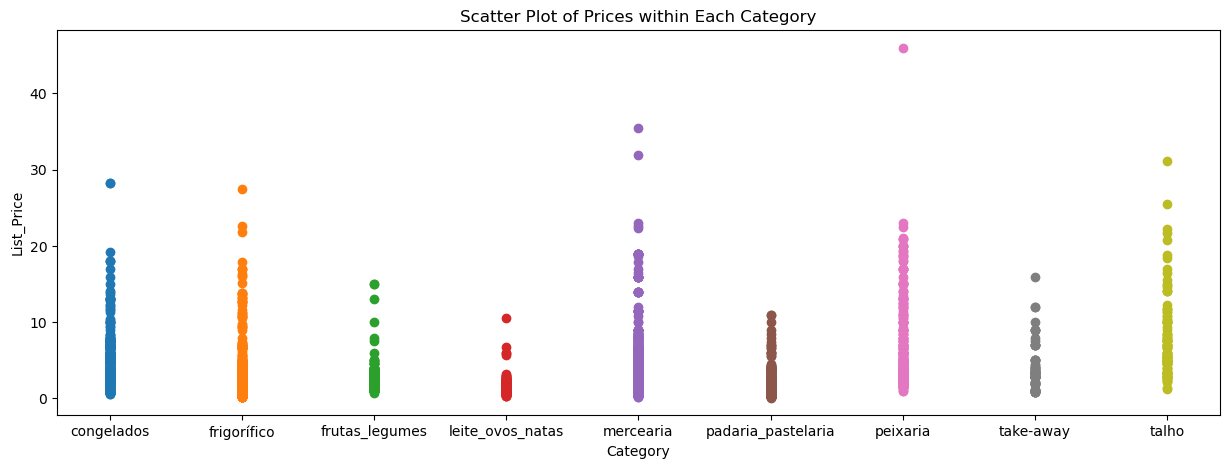

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group the data by 'Category'
grouped_data = pingo_doce.groupby("Category")
fig, ax = plt.subplots(figsize=(15,5))

# Plot scatter plot for each category
for category, data in grouped_data:
    plt.scatter(data["Category"], data["List_Price"], label=category)
# Customize the plot
plt.xlabel("Category")
plt.ylabel("List_Price")
plt.title("Scatter Plot of Prices within Each Category")
plt.show()

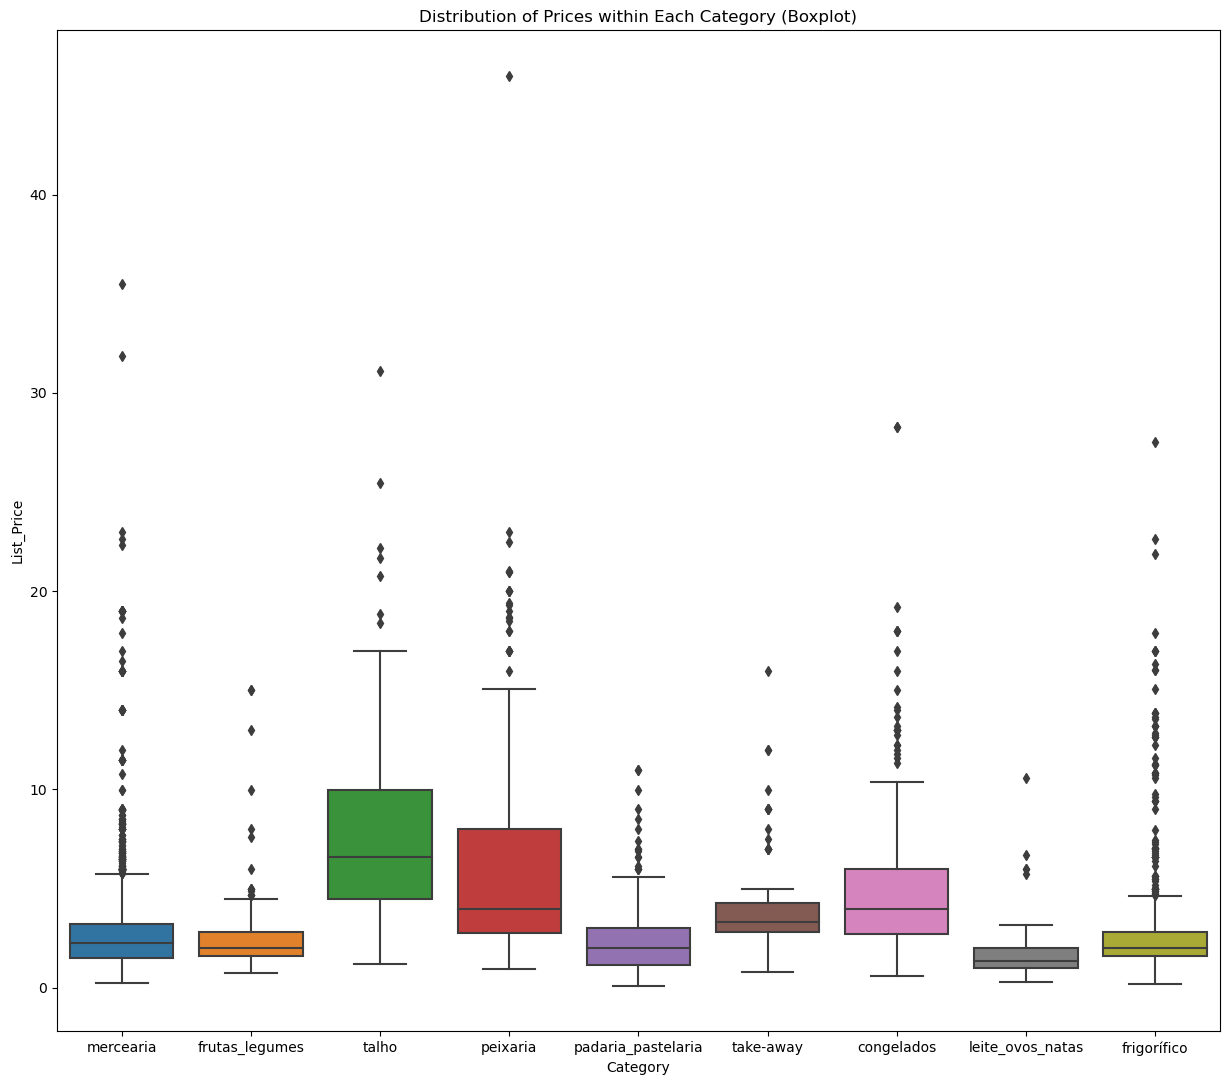

In [62]:
plt.figure(figsize=(15, 13))
sns.boxplot(data=pingo_doce, x='Category', y='List_Price')
plt.xlabel('Category')
plt.ylabel('List_Price')
plt.title('Distribution of Prices within Each Category (Boxplot)')
plt.show()

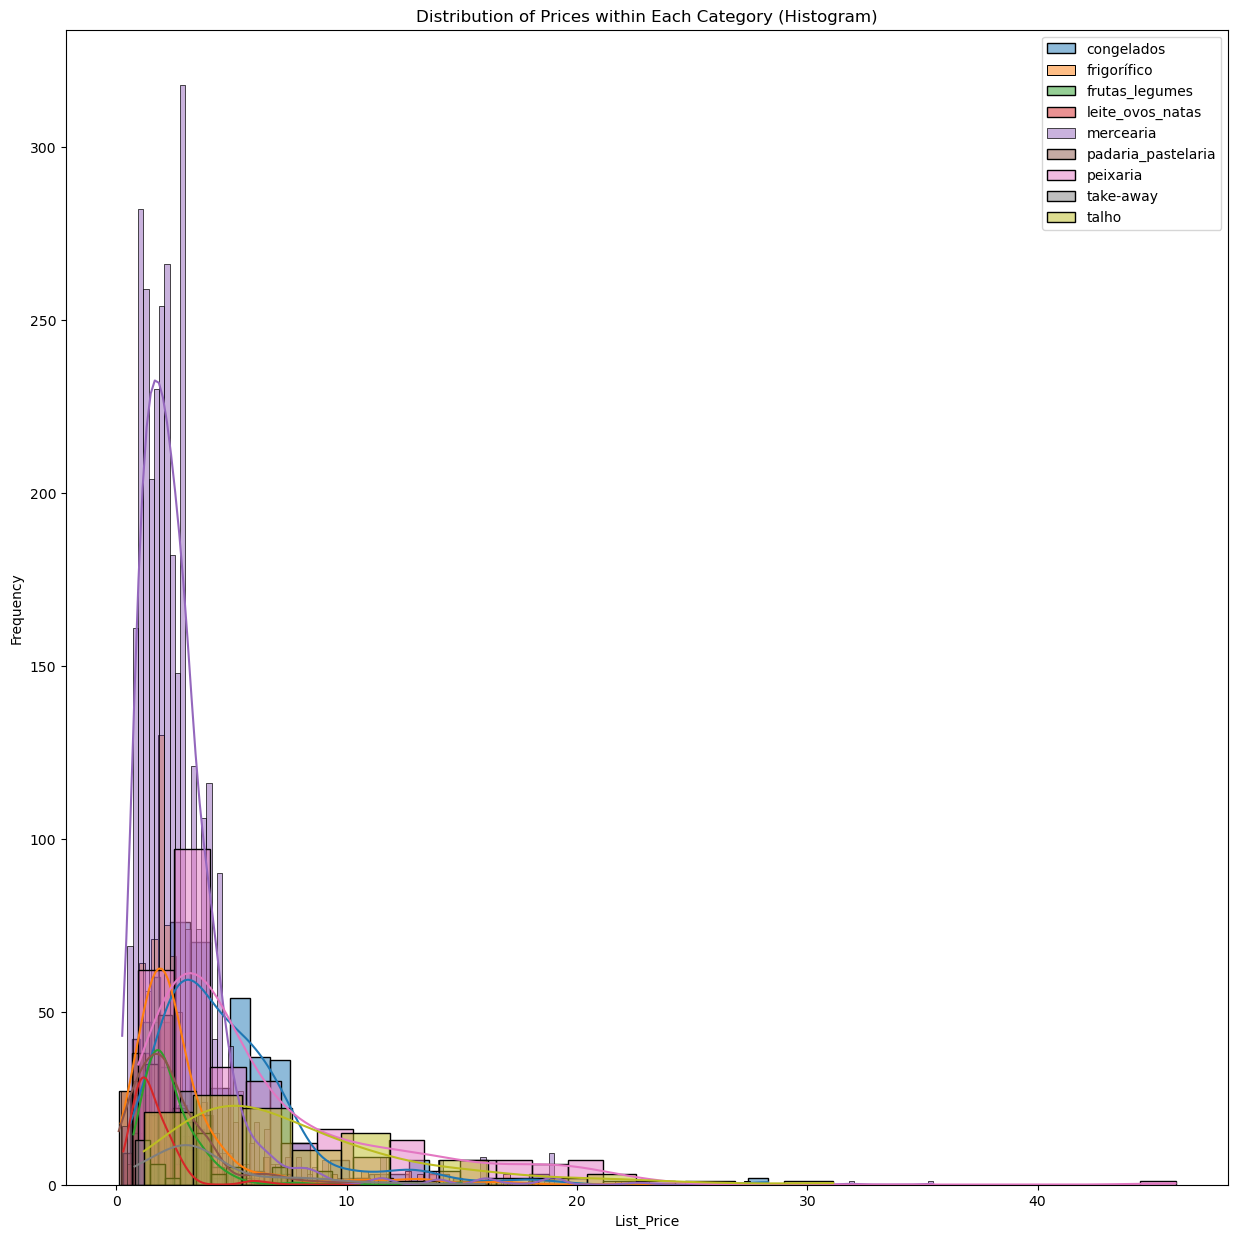

In [63]:

plt.figure(figsize=(15, 15))
for category, data in grouped_data:
    sns.histplot(data['List_Price'], label=category, kde=True)
plt.xlabel('List_Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices within Each Category (Histogram)')
plt.legend()
plt.show()

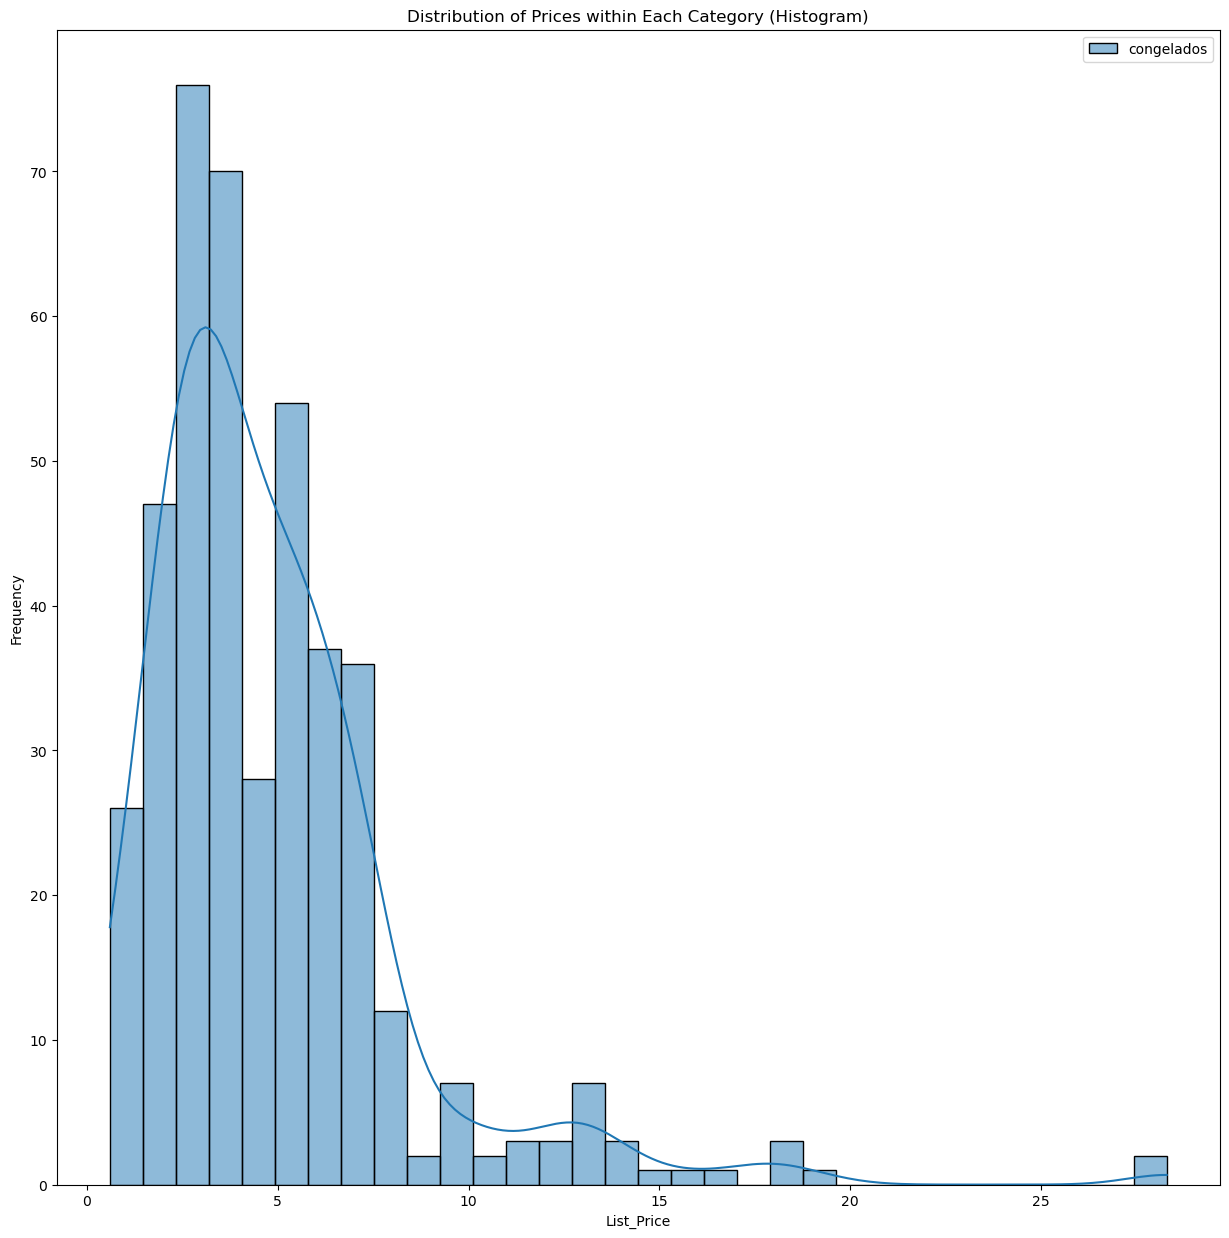

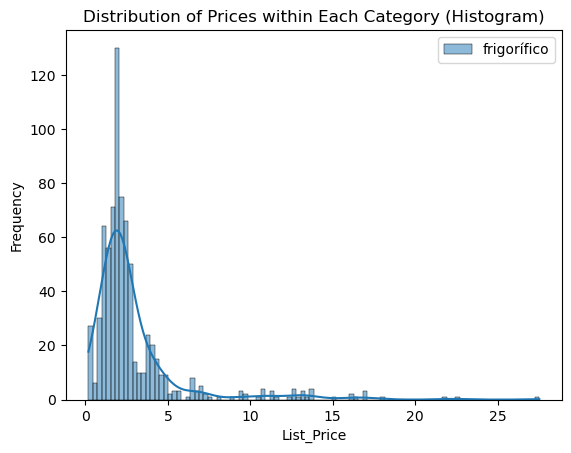

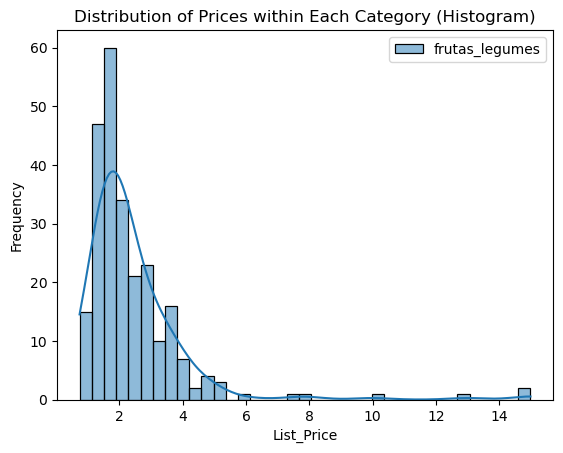

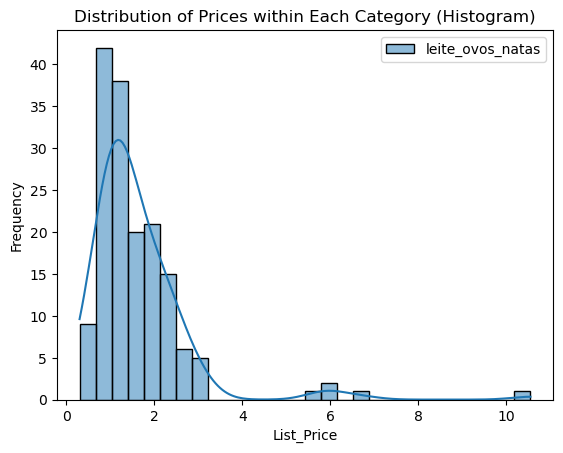

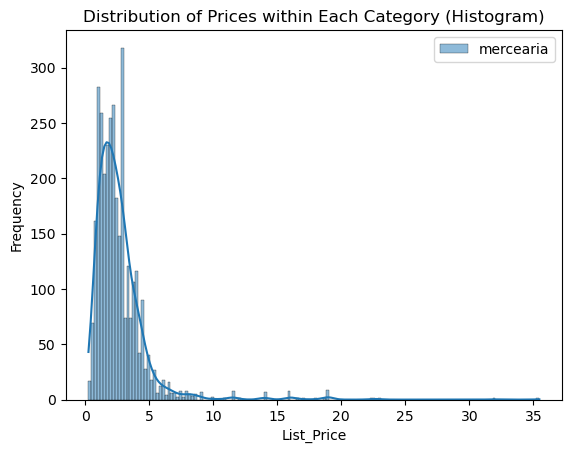

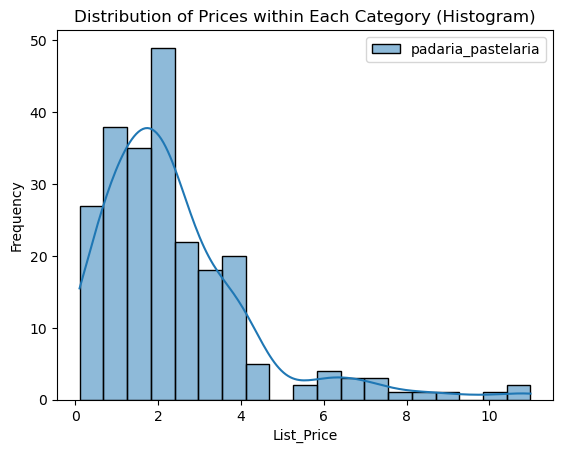

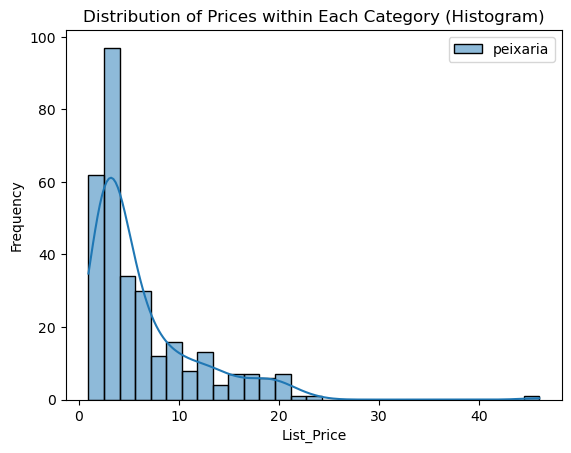

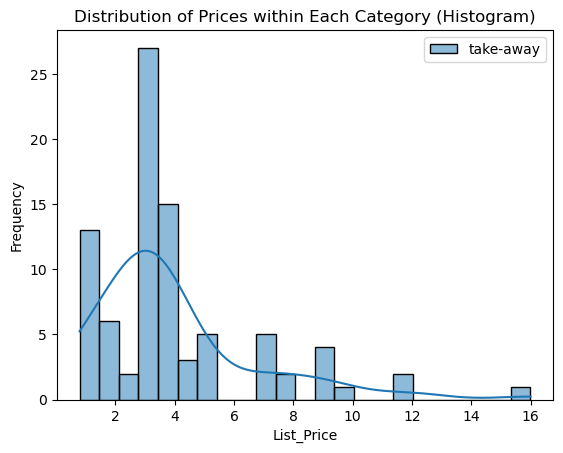

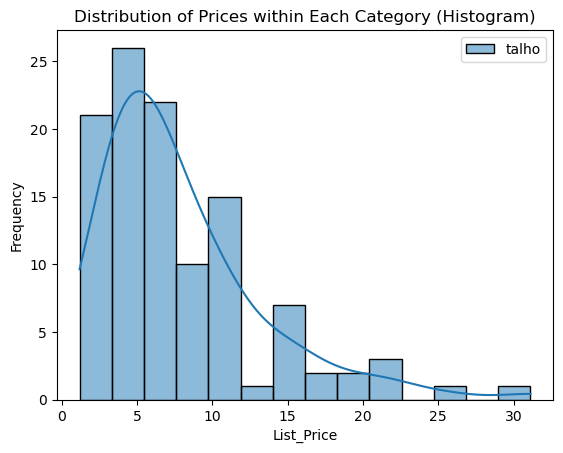

In [64]:
plt.figure(figsize=(15, 15))
for category, data in grouped_data:
    cat = str(category)
    sns.histplot(data['List_Price'], label=category, kde=True)
    plt.xlabel('List_Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prices within Each Category (Histogram)')
    plt.legend()
    plt.show()

In [65]:
grouped_cat_price = pingo_doce.groupby("Category")["List_Price"].describe()
grouped_cat_price

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
congelados,422.0,4.895427,3.467979,0.60,2.7275,3.99,5.99,28.29
frigorífico,755.0,2.884212,2.973636,0.18,1.5900,2.01,2.82,27.53
frutas_legumes,249.0,2.450602,1.761619,0.74,1.5900,1.99,2.82,14.99
leite_ovos_natas,161.0,1.629006,1.193280,0.30,0.9800,1.35,1.99,10.55
mercearia,3279.0,2.676862,2.212331,0.25,1.4900,2.25,3.19,35.47
padaria_pastelaria,232.0,2.386034,1.882689,0.10,1.1500,1.99,2.99,10.99
peixaria,306.0,6.253497,5.487680,0.95,2.7500,3.97,7.99,45.99
take-away,86.0,3.930698,2.806580,0.79,2.7900,3.29,4.29,15.99
talho,111.0,7.880270,5.356397,1.19,4.4850,6.59,9.99,31.12


In [67]:
pingo_doce

,Category,Name,Amount,Units,List_Price,Price_per_unit_of_measure,Currency
0,mercearia,Doce de Abóbora Sabores do Campo,0.310,KG,1.99,6.42,€
1,mercearia,Sal em Saco Rui Simeão Marinho DOP,1.500,KG,1.37,0.91,€
2,mercearia,Doce de Tomate Sabores do Campo,0.310,KG,1.99,6.42,€
3,mercearia,Snack Hóstias de Camarão Zanuy,0.050,KG,1.79,35.80,€
4,mercearia,Cacau Cru em Pepitas Seara,0.100,KG,3.99,39.90,€
...,...,...,...,...,...,...,...
6179,frigorífico,Iogurte Soja sem Açúcar Frutos Vermelhos Alpro,0.135,KG,1.16,8.59,€
6180,frigorífico,Iogurte Líquido sem Lactose de Mirtilo e Chá ...,0.624,KG,3.10,19.87,€
6181,frigorífico,Iogurte Skyr de Soja Natural Alpro,0.400,KG,2.82,7.05,€
6182,frigorífico,Iogurte Skyr de Soja Morango Alpro,0.400,KG,2.82,7.05,€
